In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from statistics import mean

In [2]:
data = pd.read_excel("C:/Users/USER/Downloads/Book1.xlsx")
df = pd.DataFrame(data)
df

,X,Y
0,4.0,4.0
1,0.0,4.0
2,1.0,3.4
3,1.7,3.6
4,2.5,3.1
5,2.8,3.3
6,4.0,2.6
7,4.5,2.9
8,6.0,2.0
9,7.0,3.7


In [3]:
X = df['X']
y = df['Y']

In [4]:
class Regression:
    
    def __init__(self, X, y):
        self.X = X
        self.y = y
        self.X_arr = self.X.to_numpy()
        self.y_arr = self.y.to_numpy()
        self.X1_arr = np.column_stack((np.ones(len(self.X_arr)), self.X_arr))

    def beta_OLS(self):
        beta = np.linalg.inv(self.X1_arr.T.dot(self.X1_arr)).dot(self.X1_arr.T).dot(self.y_arr)
        return beta
    
    def predict(self, beta):
        y_pred = beta[0] + beta[1] * self.X.to_numpy()
        return y_pred
    
    def error(self, y_pred):
        error = self.y - y_pred
        return error
    
    def eval_MSE(self, error):
        MSE = mean(error**2)
        return MSE
    
    def eval_R2(self, error):
        R2 = 1 - (sum(error**2) / sum((self.y - mean(self.y))**2))
        return R2
    
    def higher_order_regression(self, degree):
        return self.HOL(self, degree)
    
    class HOL:
        def __init__(self, outer, degree):
            self.outer = outer
            self.degree = degree
            self.X_arr = self.outer.X.to_numpy()
            self.y_arr = self.outer.y.to_numpy().reshape(-1, 1)
            self.X_matrix = np.zeros((len(self.X_arr), degree+1))
            for i in range(degree+1):
                for j in range(len(self.X_arr)):
                    self.X_matrix[j, i] = self.X_arr[j]**i            
        
        def beta(self):
            beta = np.linalg.inv(self.X_matrix.T.dot(self.X_matrix)).dot(self.X_matrix.T).dot(self.y_arr)
            return beta
        
        def predict(self):
            beta = self.beta()
            y_pred = self.X_matrix.dot(beta)
            return y_pred
    
    def beta_WLS(self):
        weights = np.identity(len(self.X), dtype=float)
        beta = np.linalg.inv(self.X1_arr.T.dot(np.linalg.inv(weights)).dot(self.X1_arr)).dot(self.X1_arr.T).dot(np.linalg.inv(weights)).dot(self.y_arr)
        y_pred = self.predict(beta)
        error = self.error(y_pred)
        norm = 1
        
        while norm > 1e-10:
            weights = np.diag(error ** 2)
            weights[0][0] = error[0]
            last_beta = beta
            beta = np.linalg.inv(self.X1_arr.T.dot(np.linalg.inv(weights)).dot(self.X1_arr)).dot(self.X1_arr.T).dot(np.linalg.inv(weights)).dot(self.y_arr)
            y_pred = self.predict(beta)
            error = self.error(y_pred)
            norm = np.sqrt(((last_beta[0] - beta[0])**2) + ((last_beta[1] - beta[1])**2))
        
        return beta

## OLS

In [5]:
reg = Regression(X, y)
beta = reg.beta_OLS()
y_pred = reg.predict(beta)
error = reg.error(y_pred)
mse = reg.eval_MSE(error)
r2 = reg.eval_R2(error)

print("Coefficients (beta):")
print("beta_0 (intercept):", beta[0])
print("beta_1 (slope):", beta[1])
print(f"equation: {beta[0]} + {beta[1]}*Xi")
print()
print(f'MSE: {mse}')
print(f'R^2: {r2}')

Coefficients (beta):
beta_0 (intercept): 3.850697409621406
beta_1 (slope): -0.1961286649587246
equation: 3.850697409621406 + -0.1961286649587246*Xi

MSE: 0.2957235031786697
R^2: 0.4614368982202044


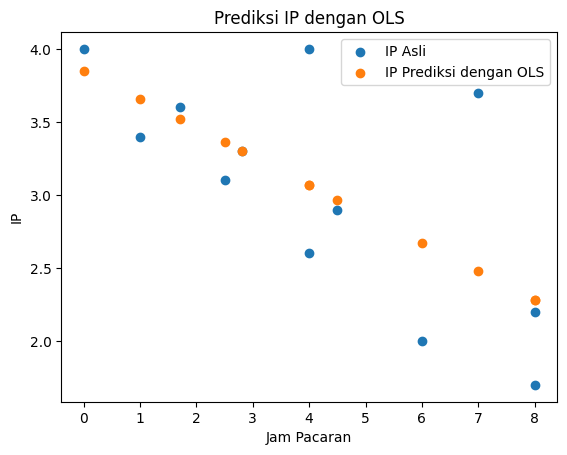

In [6]:
plt.scatter(X, y, label='IP Asli')
plt.scatter(X, y_pred, label='IP Prediksi dengan OLS')

plt.title('Prediksi IP dengan OLS')
plt.xlabel('Jam Pacaran')
plt.ylabel('IP')

plt.legend()

plt.show()

## High Order Linear

In [7]:
hol_reg = reg.higher_order_regression(6)
beta_hol = hol_reg.beta()
y_pred_hol = hol_reg.predict().T[0]
error_hol = reg.error(y_pred_hol)
mse_hol = reg.eval_MSE(error_hol)
r2_hol = reg.eval_R2(error_hol)

print(f'Beta: \n{beta_hol}')
print()
print(f'MSE: {mse_hol}')
print(f'R^2: {r2_hol}')

Beta: 
[[ 3.97326021e+00]
 [ 1.71111670e+00]
 [-4.02612812e+00]
 [ 2.59170848e+00]
 [-7.13776504e-01]
 [ 8.78736537e-02]
 [-3.97035180e-03]]

MSE: 0.11935245567753765
R^2: 0.7826387553109218


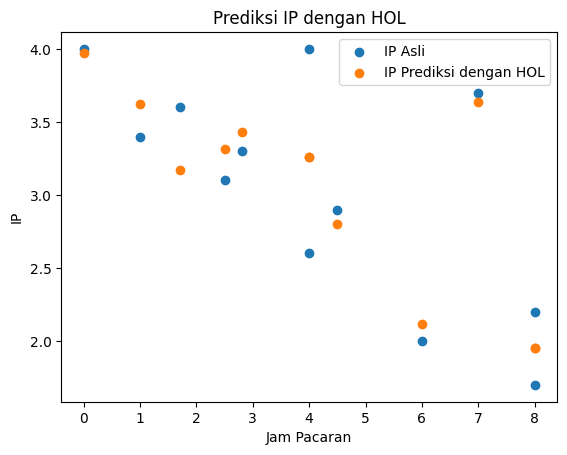

In [8]:
plt.scatter(X, y, label='IP Asli')
plt.scatter(X, y_pred_hol, label='IP Prediksi dengan HOL')

plt.title('Prediksi IP dengan HOL')
plt.xlabel('Jam Pacaran')
plt.ylabel('IP')

plt.legend()

plt.show()

## WLS

In [9]:
beta_wls = reg.beta_WLS()
y_pred_wls = reg.predict(beta_wls)
error_wls = reg.error(y_pred_wls)
mse_wls = reg.eval_MSE(error_wls)
r2_wls = reg.eval_R2(error_wls)

print("Coefficients (beta):")
print("beta_0 (intercept):", beta_wls[0])
print("beta_1 (slope):", beta_wls[1])
print(f"equation: {beta_wls[0]} + {beta_wls[1]}*Xi")
print()
print(f'MSE: {mse_wls}')
print(f'R^2: {r2_wls}')

Coefficients (beta):
beta_0 (intercept): 3.89230769230777
beta_1 (slope): -0.21153846153848238
equation: 3.89230769230777 + -0.21153846153848238*Xi

MSE: 0.2977696622288014
R^2: 0.4577104924630403


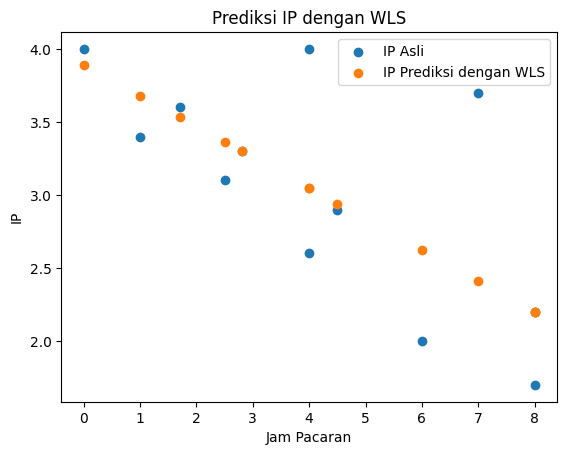

In [10]:
plt.scatter(X, y, label='IP Asli')
plt.scatter(X, y_pred_wls, label='IP Prediksi dengan WLS')

plt.title('Prediksi IP dengan WLS')
plt.xlabel('Jam Pacaran')
plt.ylabel('IP')

plt.legend()

plt.show()

### Mencoba Algoritma OLS, High Order Linear, dan WLS untuk Prediksi Nilai Siswa Berdasarkan Waktu Belajar

sumber data: https://www.kaggle.com/datasets/himanshunakrani/student-study-hours?select=score_updated.csv

In [11]:
data_2 = pd.read_csv("C:/Users/USER/Downloads/score_updated.csv")
df_2 = pd.DataFrame(data_2)
df_2

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
...,...,...
91,5.8,60
92,4.4,44
93,6.1,63
94,3.7,37


In [12]:
X_2 = df_2['Hours']
y_2 = df_2['Scores']

## OLS

In [13]:
reg_2 = Regression(X_2, y_2)
beta_2 = reg_2.beta_OLS()
y_pred_2 = reg_2.predict(beta_2)
error_2 = reg_2.error(y_pred_2)
mse_2 = reg_2.eval_MSE(error_2)
r2_2 = reg_2.eval_R2(error_2)

print("Coefficients (beta):")
print("beta_0 (intercept):", beta_2[0])
print("beta_1 (slope):", beta_2[1])
print(f"equation: {beta_2[0]} + {beta_2[1]}*Xi")
print()
print(f'MSE: {mse_2}')
print(f'R^2: {r2_2}')

Coefficients (beta):
beta_0 (intercept): 1.863576628117463
beta_1 (slope): 9.90131825924604
equation: 1.863576628117463 + 9.90131825924604*Xi

MSE: 11.540210829509418
R^2: 0.9813673346564977


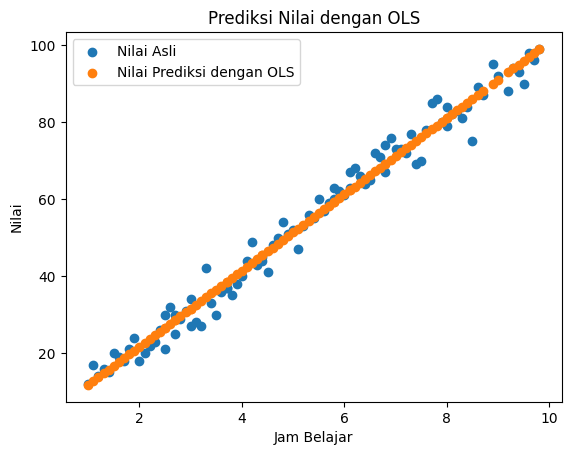

In [14]:
plt.scatter(X_2, y_2, label='Nilai Asli')
plt.scatter(X_2, y_pred_2, label='Nilai Prediksi dengan OLS')

plt.title('Prediksi Nilai dengan OLS')
plt.xlabel('Jam Belajar')
plt.ylabel('Nilai')

plt.legend()

plt.show()

## High Order Linear

In [15]:
hol_reg_2 = reg_2.higher_order_regression(7)
beta_hol_2 = hol_reg_2.beta()
y_pred_hol_2 = hol_reg_2.predict().T[0]
error_hol_2 = reg_2.error(y_pred_hol_2)
mse_hol_2 = reg_2.eval_MSE(error_hol_2)
r2_hol_2 = reg_2.eval_R2(error_hol_2)

print(f'Beta: \n{beta_hol_2}')
print()
print(f'MSE: {mse_hol_2}')
print(f'R^2: {r2_hol_2}')

Beta: 
[[ 1.91267048e+00]
 [ 1.42411222e+01]
 [-3.33325105e+00]
 [ 4.16276347e-01]
 [ 1.54936710e-01]
 [-4.51782877e-02]
 [ 4.10481555e-03]
 [-1.26344384e-04]]

MSE: 10.196962319742081
R^2: 0.9835361251860133


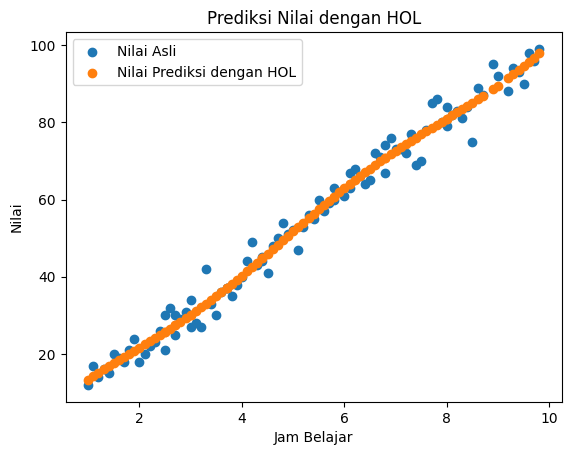

In [16]:
plt.scatter(X_2, y_2, label='Nilai Asli')
plt.scatter(X_2, y_pred_hol_2, label='Nilai Prediksi dengan HOL')

plt.title('Prediksi Nilai dengan HOL')
plt.xlabel('Jam Belajar')
plt.ylabel('Nilai')

plt.legend()

plt.show()

## WLS

In [17]:
beta_wls_2 = reg_2.beta_WLS()
y_pred_wls_2 = reg_2.predict(beta_wls_2)
error_wls_2 = reg_2.error(y_pred_wls_2)
mse_wls_2 = reg_2.eval_MSE(error_wls_2)
r2_wls_2 = reg_2.eval_R2(error_wls_2)

print("Coefficients (beta):")
print("beta_0 (intercept):", beta_wls_2[0])
print("beta_1 (slope):", beta_wls_2[1])
print(f"equation: {beta_wls_2[0]} + {beta_wls_2[1]}*Xi")
print()
print(f'MSE: {mse_wls_2}')
print(f'R^2: {r2_wls_2}')

Coefficients (beta):
beta_0 (intercept): 2.138888888886081
beta_1 (slope): 9.861111111110704
equation: 2.138888888886081 + 9.861111111110704*Xi

MSE: 11.554267537936822
R^2: 0.9813446388888182


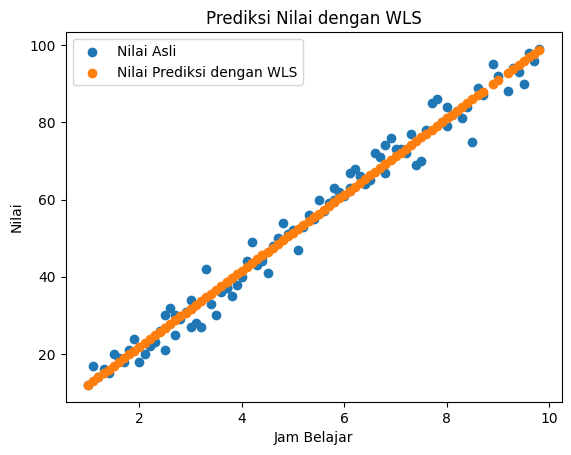

In [18]:
plt.scatter(X_2, y_2, label='Nilai Asli')
plt.scatter(X_2, y_pred_wls_2, label='Nilai Prediksi dengan WLS')

plt.title('Prediksi Nilai dengan WLS')
plt.xlabel('Jam Belajar')
plt.ylabel('Nilai')

plt.legend()

plt.show()